In [11]:
%load_ext autoreload
%autoreload 2

import sys
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sys.path.append('../../src')
from paths import FMTD_DB_DIR

from utils.functions import load_datasets_from_csv

from gaps.functions import find_series_gaps, flatten_series_gaps
from gaps.plots import show_gaps

from outliers.functions import find_outliers
from outliers.plots import show_outliers

from statsmodels.tsa.seasonal import seasonal_decompose


from plot import show_series

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
sns.set_style({'font.family':'sans', 'font.serif':'Helvetica', 'font.mono':'Helvetica'})
sns.set_context(rc={"font.size":11,"axes.titlesize":14,"axes.labelsize":12})

In [8]:
dts = load_datasets_from_csv(FMTD_DB_DIR).copy()

### The following series refer to the temperatures and humidity inside room 1, where the air conditioner is located. The power series is from the equipment itself.

## 1.1 Preview

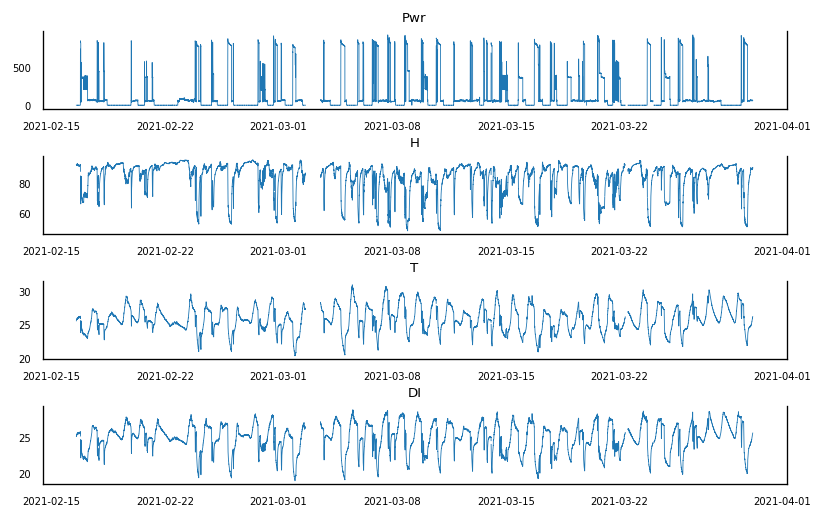

In [9]:
show_series(dts['air'])

In [10]:
dts['air'].describe()

,Pwr,H,T,DI
count,28770.000000,28770.000000,28770.000000,28770.000000
mean,126.114203,83.988373,25.912122,24.957940
std,237.473582,10.664709,1.887723,2.019562
min,-8.879000,48.321500,20.347300,18.895000
25%,0.008500,80.949775,24.641100,23.806150
50%,51.860750,87.855500,25.746600,25.108800
75%,64.631500,91.391000,27.292700,26.521250
max,923.265400,96.139500,30.988400,28.905200


## 1.2 Missing data

In [26]:
# a)  Size and Quantity in PWR time serie
gaps = find_series_gaps(dts['air'])
l = list()
for gap in gaps['Pwr']:
    #print(len(hole))
    l.append(len(gap))
pd.Series(l).value_counts()

1      358
20       1
25       1
41       1
121      1
664      1
185      1
dtype: int64

In [27]:
# b)  Size and Quantity in T time serie
l = list()
for gap in gaps['T']:
    #print(len(hole))
    l.append(len(gap))
pd.Series(l).value_counts()

1      358
20       1
25       1
41       1
121      1
664      1
185      1
dtype: int64

In [29]:
# c)  Size and Quantity in H time serie
l = list()
for gap in gaps['H']:
    #print(len(hole))
    l.append(len(gap))
pd.Series(l).value_counts()

1      358
20       1
25       1
41       1
121      1
664      1
185      1
dtype: int64

In [30]:
# d)  Size and Quantity in DI time serie
l = list()
for gap in gaps['DI']:
    #print(len(hole))
    l.append(len(gap))
pd.Series(l).value_counts()

1      358
20       1
25       1
41       1
121      1
664      1
185      1
dtype: int64

In [31]:
gaps_flat = flatten_series_gaps(gaps)

In [32]:
for key in gaps_flat:
    dts['air']['Hole'+key] = np.NaN
    dts['air'].loc[gaps_flat[key] , ('Hole'+key)] = 0

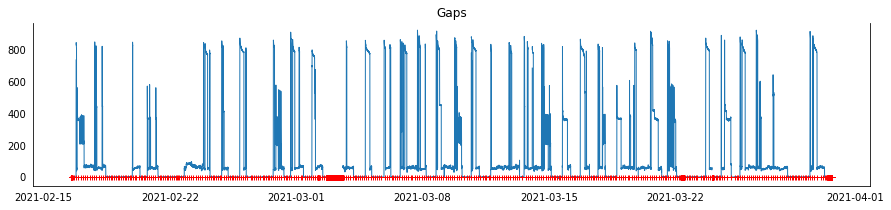

In [33]:
show_gaps(dts['air']['Pwr'], dts['air']['HolePwr'])

## 1.3 Outliers

Number of outliers: 284


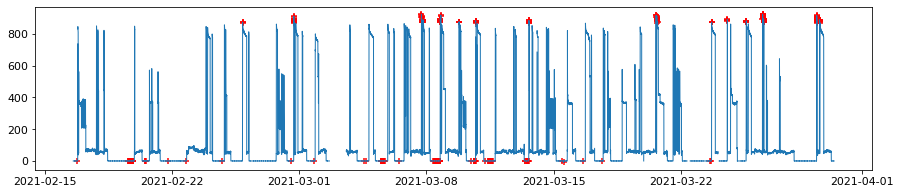

In [43]:
# Finding outliers above 99,5 percentile in Pwr serie
fltr = find_outliers(dts['air']['Pwr'], 0.005)
print("Number of outliers:", (fltr == True).sum())

# Show outliers in PWR time serie
otlrs = dts['air'].loc[fltr, 'Pwr']
show_outliers(dts['air']['Pwr'], otlrs)

Number of outliers: 30


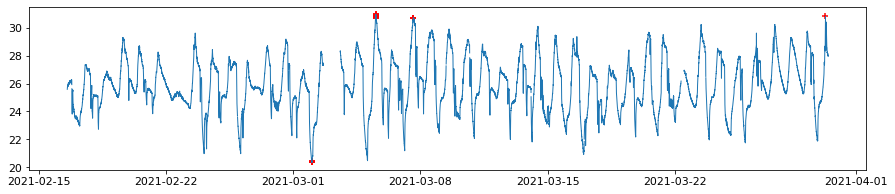

In [45]:
# Finding outliers above 99,5 percentile in T serie
fltr = find_outliers(dts['air']['T'], 0.0005)
print("Number of outliers:", (fltr == True).sum())

# Show outliers in T serie
otlrs = dts['air'].loc[fltr, 'T']
show_outliers(dts['air']['T'], otlrs)

Number of outliers: 30


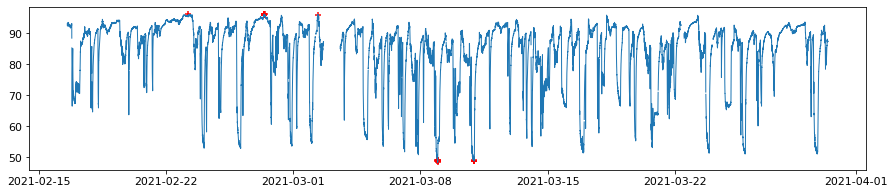

In [46]:
# Finding outliers above 99,5 percentile in H serie
fltr = find_outliers(dts['air']['H'], 0.0005)
print("Number of outliers:", (fltr == True).sum())

# Show outliers in H serie
otlrs = dts['air'].loc[fltr, 'H']
show_outliers(dts['air']['H'], otlrs)

Number of outliers: 30


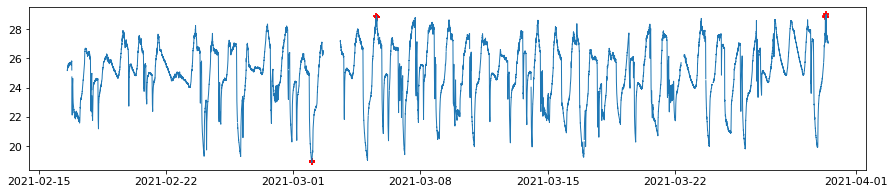

In [47]:
# Finding outliers above 99,5 percentile in H serie
fltr = find_outliers(dts['air']['DI'], 0.0005)
print("Number of outliers:", (fltr == True).sum())

# Show outliers in H serie
otlrs = dts['air'].loc[fltr, 'DI']
show_outliers(dts['air']['DI'], otlrs)

## 1.4 Other loads signals

### Due to the fact that the measurements were not made directly in the equipment phase, but in the TUG'S or TUE'S, the series may contain signals from other loads

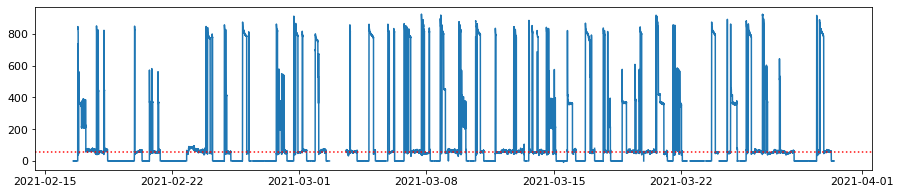

In [48]:
fig, ax = plt.subplots(figsize=(15,3), sharex=True)
ax.plot(dts['air']['Pwr'])
ax.axhline(58, color='red', ls='dotted', alpha=0.95)